In [6]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [7]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [38]:
from keras import models, layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

In [39]:
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[: i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
        axis = 0
    )
    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs,
                        batch_size=1,
                        verbose=0)
    all_mae_histories.append(history.history['val_mean_absolute_error'])

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [60]:
average_mae_history = [ np.mean(np.array(all_mae_histories)[:, i]) for i in range(num_epochs)]


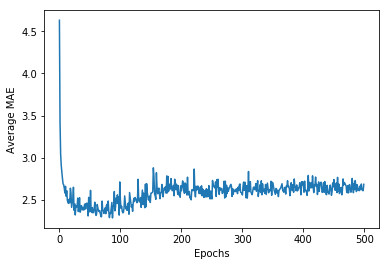

3.175322853692687

In [61]:
from matplotlib import pyplot as plt

plt.plot(range(len(average_mae_history)), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Average MAE')
plt.show()

num_epochs

all_mae_histories[1][1]

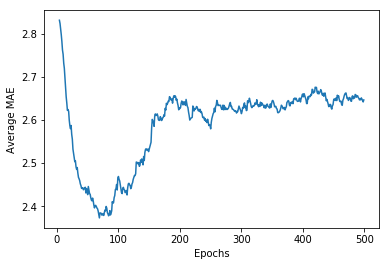

In [69]:
from smoothly import smooth_curve

smoothed = smooth_curve(average_mae_history[4:])

plt.plot(range(4, len(average_mae_history)), smoothed)
plt.xlabel('Epochs')
plt.ylabel('Average MAE')
plt.show()

In [75]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 3ms/step


[17.513910480574065, 2.6749101526596966]